<a href="https://colab.research.google.com/github/vc0408/TuringMachineLearning_VC/blob/main/Week3HWLate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [121]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [122]:
df = pd.read_csv('tmdb_5000_movies.csv')


View information about the dataset including datatypes and null values

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

*homepage, release_date, overview, runtime, tagline all have null values as there are 4803 entries for any non-null count less than 4803 implies that there is a null value in this column. Estimating the homepage would not be possible, as its unique for each movie, the same holds for release_date, overview and tagline. Runtime could be estimated by taking an average of all films or even the average of films of the same genre (might be more accurate).*

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [124]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [125]:
df = df.dropna(subset = ['overview']) # drop na values
df = df.reset_index(drop = True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [126]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index = unique_labels.index(label)
    out[index] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(row["genres"]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(row["proc_genres"], unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 15207.59it/s]


Verify that one-hot encodings are indeed as expected

In [127]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

100%|██████████| 4800/4800 [00:00<00:00, 17445.01it/s]


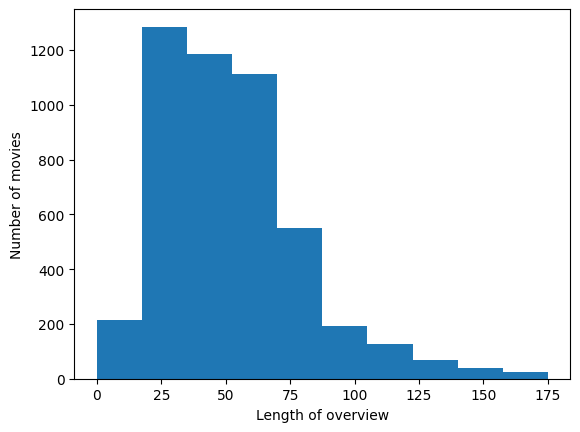

                        title  \
1669              The Promise   
2647  The Midnight Meat Train   

                                               overview  \
1669  An orphaned girl, driven by poverty at such a ...   
2647  The photographer Leon lives with his girlfrien...   

                                                 genres proc_genres  \
1669  [{"id": 14, "name": "Fantasy"}, {"id": 18, "na...       Drama   
2647  [{"id": 9648, "name": "Mystery"}, {"id": 18, "...    Thriller   

                                         one_hot_genres  \
1669  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
2647  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                          proc_overview  overview_len  
1669  an orphaned girl driven by poverty at such a y...           175  
2647  the photographer leon lives with his girlfrien...           175  
                    title overview  \
4399  The Helix... Loaded            

                                     

In [128]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in tqdm(df.iterrows(), total = len(df)):
  processed_overview = remove_punctuation(row["overview"])
  processed_overview = processed_overview.lower()
  processed_overviews.append(processed_overview)

df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for index, row in df.iterrows():
    word_count = len(row["proc_overview"].split())
    overview_lens.append(word_count)

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(overview_lens)
plt.xlabel('Length of overview')
plt.ylabel('Number of movies')
plt.show()
print(df[df["overview_len"] == df["overview_len"].max()])
print(df[df["overview_len"] == df["overview_len"].min()])

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

*The largest overview is 'The Midnight Meat Train' with an overview length of 175, while the shortest overview is 'The Helix... Loaded' with an overview length of 0. This might be because it could be a character or something removed previously. I would choose somewhere in between 100-400 words, as this is where most overviews are according to the histogram. So, to put a number to this, about 180 words. Since, the most common bin is 100-200 but there are still a lot of movies between 200-400, 180 seems like a fair estimate.*

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [129]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= token_len]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
truncated_overviews = []
for overview in df["proc_overview"]:
    words = str(overview).split()
    truncated = words[:token_len]
    truncated_overviews.append(truncated)

df["proc_overview"] = truncated_overviews

# print to verify
df["proc_overview"].head()

<ipython-input-129-effdf6cee88a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proc_overview"] = truncated_overviews


,proc_overview
0,"[in, the, 22nd, century, a, paraplegic, marine..."
1,"[captain, barbossa, long, believed, to, be, de..."
2,"[a, cryptic, message, from, bonds, past, sends..."
3,"[following, the, death, of, district, attorney..."
4,"[john, carter, is, a, warweary, former, milita..."


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [130]:
# hint: store all words for all movies in a set, change it to a list and sort

total_words = []
for row in df["proc_overview"]:
    total_words.extend(row)

total_vocab_set = sorted(set(total_words))
vocab_len = len(total_vocab_set)

print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [131]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    index = unique_labels.index(label)
    out[index] = 1
    return out

encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, total_vocab_set)) # get encoding for this word
    sentence_encode =  np.sum(sentence_encode, axis=0)
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4707/4707 [00:16<00:00, 286.98it/s]


,one_hot_overview
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...
4794,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4795,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4797,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4798,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

*4707 rows, 12493 total words and 16-bytes per number. This results to 940872816 bytes or about 900MB.*

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

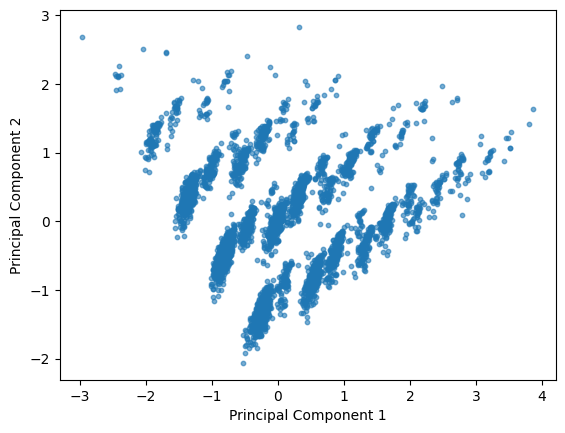

In [132]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
x = np.stack(df["one_hot_overview"].values)

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x)

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], alpha = 0.6, s = 10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

*Yes it looks like the overview clusters closely together in similar intervals. Maybe this could be similar genres that use similar words, e.g a Horror movie is likely to have words like murder, demon, spirit, ghost, etc in their overview.*

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

*This shrinks the data from 12493 dimensions to 2 dimensions. So checking the sum of the explained variance from both components results, and subtracting it by 1 yields 0.887 lost variance. This is subtracted by 1 as the total variance is normalized to the standard normal distribution.*

In [133]:
explained_variance = pca.explained_variance_ratio_

total_variance = np.sum(explained_variance)
print(1-total_variance)

0.8871154913247568


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

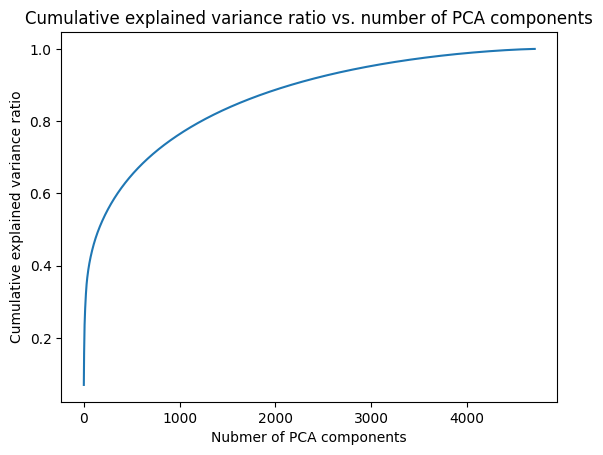

In [134]:
# Set up PCA object with the desired number of components
# PCA max is min(n_samples, n_features)
pca = PCA(n_components = 4707)
x_train_pca = pca.fit_transform(x)
powers = pca.explained_variance_ratio_

# fit transform one_hot_overview encodings
labels_pca = np.cumsum(powers).tolist()
# get explained variance ratio from object, store it in a list


plt.plot(labels_pca)
# set up y label, x label, title
plt.xlabel("Nubmer of PCA components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("Cumulative explained variance ratio vs. number of PCA components")
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [135]:
# your code answer here
for explained_var in labels_pca:
    if explained_var >= 0.8:
        print(labels_pca.index(explained_var))
        break

1225


*You need 1225 components to explain 80% of the total variance*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [140]:
n_dims = 1225
pca = PCA(n_components = n_dims, svd_solver='randomized')
x_train_pca = pca.fit_transform(x)

labels_pca = list(x_train_pca)
df["overview_pca"] = labels_pca

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [141]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
kmeans.fit(x_train_pca)

y_preds =  kmeans.predict(x_train_pca) # get predictions
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
print(df[df["cluster_kmeans"] == 0])

                                    title  \
16                           The Avengers   
18                         Men in Black 3   
22    The Hobbit: The Desolation of Smaug   
29                                Skyfall   
38               The Amazing Spider-Man 2   
...                                   ...   
4692                   Children of Heaven   
4700                              Tadpole   
4762                       Raymond Did It   
4770                               Clerks   
4784             All Superheroes Must Die   

                                               overview  \
16    When an unexpected enemy emerges and threatens...   
18    Agents J (Will Smith) and K (Tommy Lee Jones) ...   
22    The Dwarves, Bilbo and Gandalf have successful...   
29    When Bond's latest assignment goes gravely wro...   
38    For Peter Parker, life is busy. Between taking...   
...                                                 ...   
4692  Zohre's shoes are gone; her older brothe

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

*Not really, it seems like the group contains all sorts of movies from several ranging genres from Family movies to horror ones. However, overall a fantasy fiction movie seems to dominate putting together Avengers, Men in Black and Hobbit together. The different genres could span from the fact that the proc_genres summed all listed genres in 1 choosing randomly and a fantasy/fiction movie could also fit in several other genres.*

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*There is not a very clear elbow, but it looks like the cluster of 5, so this is the one I would pick*

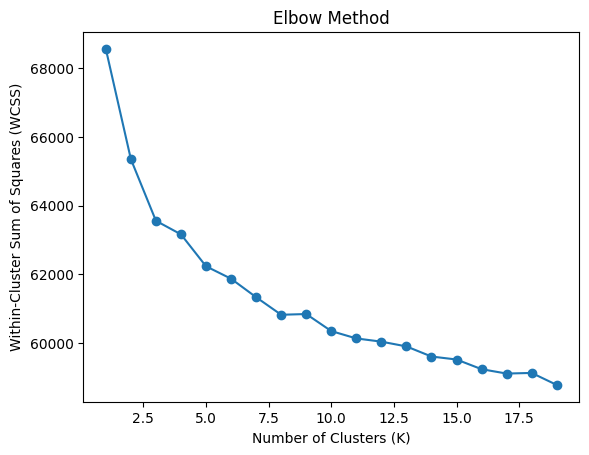

In [142]:
# your code answer here

wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [143]:
# Your code answer here
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(x_train_pca)
y_preds = gmm.predict(x_train_pca)
df["cluster_gmm"] = y_preds

print(df[df["cluster_gmm"] == 0])

                                      title  \
3                     The Dark Knight Rises   
11                        Quantum of Solace   
42                              Toy Story 3   
43                     Terminator Salvation   
66                                       Up   
...                                     ...   
4722                      Hollywood Shuffle   
4734  Peace, Propaganda & the Promised Land   
4757                  This Is Martin Bonner   
4768      Her Cry: La Llorona Investigation   
4775                                Rampage   

                                               overview  \
3     Following the death of District Attorney Harve...   
11    Quantum of Solace continues the adventures of ...   
42    Woody, Buzz, and the rest of Andy's toys haven...   
43    All grown up in post-apocalyptic 2018, John Co...   
66    Carl Fredricksen spent his entire life dreamin...   
...                                                 ...   
4722  Aspiring actor a

**Q5.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

*It does not seem to group that well, it puts several different movies together similar to K-Means Clustering. Nonetheless still some movies match like Toy Story 3 and Up both being animated, comedy movies, but it also clusters this together with Dark Knight Rises, a thriller.*

**Q5.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

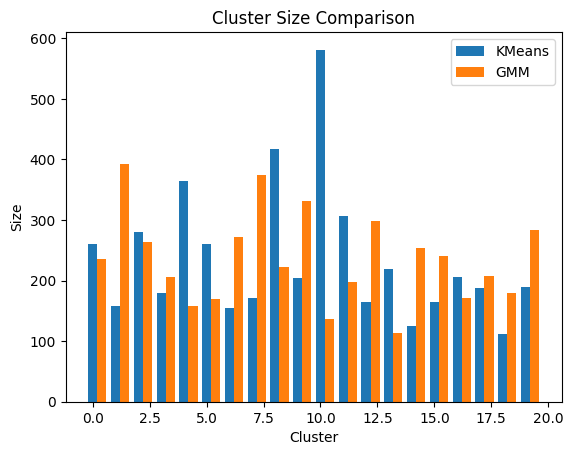

In [151]:
# Create an array for the x-axis positions
kmeans_Xs = df["cluster_kmeans"].value_counts().sort_index()
gmm_Xs = df["cluster_gmm"].value_counts().sort_index()

clusters = np.arange(0, 20)
# Plotting the bars
bar_width = 0.4
plt.bar(clusters, kmeans_Xs, width=bar_width, label='KMeans')
plt.bar(clusters + bar_width, gmm_Xs, width=bar_width, label='GMM')

# Add labels, title, and legend
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Cluster Size Comparison')
plt.legend()
plt.show()


**Q5.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

*Both vary a lot from K to K, at times for K-Means this is much larger but at other times it is not. Still, the GMM seams more uniform as KMeans has sometimes big spikes and very low drops, while for GMM this variance is lower. This could be because GMM clusters based on probabiltiy while KMeans through distance so more popular centroids might have more data attracted to it, creating a higher variance.*

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [152]:
prev_watch = "Avatar"

cluster_kmeans = df[df["title"] == prev_watch]["cluster_kmeans"].values[0]
cluster_gmm = df[df["title"] == prev_watch]["cluster_gmm"].values[0]

# print out similar movies
print("K-Means recommendations:")
print(df[df["cluster_kmeans"] == cluster_kmeans]["title"])
print("GMM recommendations:")
print(df[df["cluster_gmm"] == cluster_gmm]["title"])

K-Means recommendations:
0                          Avatar
6                         Tangled
61              Jupiter Ascending
68                       Iron Man
69                           Hugo
                  ...            
4752                     Counting
4776                      Slacker
4781              The Puffy Chair
4793                       Primer
4797    Signed, Sealed, Delivered
Name: title, Length: 365, dtype: object
GMM recommendations:
0                            Avatar
13                  The Lone Ranger
46       X-Men: Days of Future Past
55                            Brave
56                 Star Trek Beyond
                   ...             
4663                           Burn
4728          Indie Game: The Movie
4736    I Love You, Don't Touch Me!
4755                     The Signal
4766        The Legend of God's Gun
Name: title, Length: 272, dtype: object


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

*Based on the movies I know out of the recommended ones, maybe a few, Star Trek is kind of similar and Iron Man is also an action movie but not as Sci-Fi. However, it also ecommended movies like Hugo, Brave or Tangled which I would not recommend based on Avatar*

**Q6.3** How would you try making the recommender systems better?

*To make them better I would also give movies a rating for each genre, as specifying only on genre can be a too broad. Many movies are often simultaneously several different genres and the combination between all of them must be taken into account for better accuracy. Also, the Principal Component Analysis was based on 15 overview words 15, so the clustering may also be derived due to combining words like 'the', 'a' and so on which could be common for any movie. So clustering through genre ratings might be a better way to go.*

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

*I would create eate an array of the previous movies watched. Then get the pca overview of these movies and average them out. Finally, I would perform cosine similarity to find more recommendations*

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [153]:
def cosine_sim(v1, v2):
  norm1 = np.linalg.norm(v1)
  norm2 = np.linalg.norm(v2)
  sim = np.dot(v1, v2) / (norm1 * norm2)
  return sim

# get overview_pca encoding of previously watched film
prev_watch_enc = df[df["title"] == prev_watch]["overview_pca"].values[0]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row["overview_pca"]))

df["cos_sim_to_avatar"] = sims
df = df.sort_values(by="cos_sim_to_avatar", ascending=False) #sort df
df.head()

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1713055627512364, 1.2545637565431198, 1.062...",4,6,1.000000
3363,Warlock,A warlock flees from the 17th to the 20th cent...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[a, warlock, flees, from, the, 17th, to, the, ...",122,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14285163674539383, 1.1940360295714645, 1.00...",4,6,0.531251
1285,Nomad: The Warrior,The Nomad is a historical epic set in 18th-cen...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 36, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, nomad, is, a, historical, epic, set, in,...",39,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2502330102123467, 1.4192751540293158, 0.331...",4,14,0.478258
3778,Zipper,Sam Ellis is a man on the rise — a hot-shot fe...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[sam, ellis, is, a, man, on, the, rise, a, hot...",48,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.21497561521978167, 1.408547801773044, 0.514...",10,6,0.472356
415,Dredd,"In the future, America is a dystopian wastelan...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, future, america, is, a, dystopian, w...",87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.23152067361939, 1.4016470372926215, 0.35699...",4,14,0.461385


*I haven't seen any of these new movies recommended ('Warlock', 'Nomad: The Warrior', 'Zipper', 'Dredd') but based on the movie's overview, they seem quite similar to Avatar, with more dystopian/ Sci-Fi movies, similar to Avatar. It seems better than the clustering method, with more precise and tailored recommendations *

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [154]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [180]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree

x_train = np.stack(df_train["overview_pca"].values)
x_test = np.stack(df_test["overview_pca"].values)

y_train = df_train["proc_genres"].values
y_test = df_test["proc_genres"].values

100%|██████████| 15/15 [02:23<00:00,  9.55s/it]


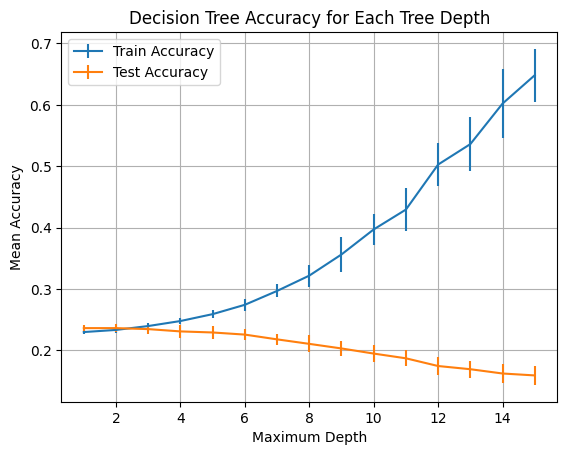

In [181]:
train_acc_mean, train_acc_std = [], []
test_acc_mean, test_acc_std = [], []

for d in tqdm(range(1, 16)):
    train_perfs = []
    test_perfs = []
    for n in range(1, 20):
        modelDT = tree.DecisionTreeClassifier(max_depth=d, splitter="random", random_state=n)
        modelDT.fit(x_train, y_train)
        train_perfs.append(modelDT.score(x_train, y_train))
        test_perfs.append(modelDT.score(x_test, y_test))
    train_acc_mean.append(np.mean(train_perfs))
    train_acc_std.append(np.std(train_perfs))
    test_acc_mean.append(np.mean(test_perfs))
    test_acc_std.append(np.std(test_perfs))

plt.errorbar(range(1, 16), train_acc_mean, yerr=train_acc_std, label='Train Accuracy')
plt.errorbar(range(1, 16), test_acc_mean, yerr=test_acc_std, label='Test Accuracy')
plt.title('Decision Tree Accuracy for Each Tree Depth')
plt.xlabel("Maximum Depth")
plt.ylabel("Mean Accuracy")
plt.legend()
plt.grid(True)
plt.show()

From this I concluded that Decision trees might not be the best method to use due to the low training data and tree depth before overfitting. So, I decided to do a random forest instead and using the one_hot_genres as well instead of the processed genres

In [182]:
import time

modelDT = tree.DecisionTreeClassifier(max_depth=2)

start_train = time.time()
modelDT.fit(x_train, y_train)
train_time = time.time() - start_train

start_infer = time.time()
y_pred = modelDT.predict(x_test)
inference_time = (time.time() - start_infer) / len(x_test)  # per sample

train_score = modelDT.score(x_train, y_train)
test_score = modelDT.score(x_test, y_test)

print("Decision Tree Classifier:")
print(f"Train Accuracy     : {train_score:.4f}")
print(f"Test Accuracy      : {test_score:.4f}")
print(f"Training Time      : {train_time:.4f} seconds")
print(f"Mean Inference Time: {inference_time:.6f} seconds/sample")

Decision Tree Classifier:
Train Accuracy     : 0.2430
Test Accuracy      : 0.2367
Training Time      : 1.9366 seconds
Mean Inference Time: 0.000004 seconds/sample


In [183]:
x_train = np.stack(df_train["overview_pca"].values)
x_test = np.stack(df_test["overview_pca"].values)

y_train = np.stack(df_train["one_hot_genres"].values)
y_test = np.stack(df_test["one_hot_genres"].values)

print(x_train.shape)
print(y_train.shape)

(3765, 1225)
(3765, 21)


In [174]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.multioutput import MultiOutputClassifier

train_acc_mean, train_acc_std = np.zeros((10, 8)), np.zeros((10, 8))
test_acc_mean, test_acc_std = np.zeros((10,8)), np.zeros((10,8))

depths = [1,3,5,7,9,11]
n_trees_list = [10, 30, 50, 70, 90]

for tree_idx, n_t in tqdm(enumerate(n_trees_list), total=len(n_trees_list)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []
        for seed in range(1, 6):
            rf = RFC(n_estimators=n_t, max_depth=d, random_state=seed, n_jobs=-1)
            modelRFC = MultiOutputClassifier(rf)
            modelRFC = modelRFC.fit(x_train, y_train)
            train_perfs.append(modelRFC.score(x_train, y_train))
            test_perfs.append(modelRFC.score(x_test, y_test))

        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 5/5 [2:58:50<00:00, 2146.15s/it]


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*First I thought of doing a more simple algorithm, checking to see which decision tree depth I should used based on the processed genre. After computing these values and plotting them (as seen above) I found out that the tree depth with the best test score accuracy was 2 and the test accuracy was 0.25, so I thought that a single decision tree would be too simple to capture all of the data's complexities*

*In addition, I thought that using the proc_genres was too simplistic as it did not take into account a movies different genres so the decision tree could not also take that into account. I decided to use sk_learn's multioutput classifier to allow one-hot vectors to be used as training data.*

*So, I decided to implement a random forest similar to last week's assignment to find out which would be the best tree depth and number of trees. I first tried with larger depths and greater number of trees but found that the computing time was excessive and took a very long time to run. So I decided to shorten the number of trees and tree depth to n.trees {10, 30, 50, 70, 90} and tree depth to {1, 3, 5, 7, 9, 11}. This still took a lot of time to run. I apologise, but this will likely not finish running until the deadline, so I included the requirements for the question for the decision tree with depth that acheived best test accuracy 2. I will finish running but after the deadline and will also included it to my GitHub*

*After running the random forests for 3 hours, the test accuracy was 0.002, so it was better to use the decision trees anyways. What most likely was the case for this, was that the one_hot_encoding results are way too hard to predict and easy to overfit given only the PCA of the overviews, which was already limited to 15 words to beging with. So its analysis could group very different movies together*

*If I were to continue working on this, I would use a decision tree with one hot encoding to see what would have the result been with that and seen if it would be possible to create a good predictor for the one-hot-encoding output.*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)